In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Lung Function Test/new3.csv')
df.head(5)

,ID,Age,Gender,Height,Weight,BMI,BMI_Cat,FVC%(B/P),FEV1%(B/P),FEV1%Max%(B/P),FEV1%FVC%(B/P),IC_F%(B/P),MEF75%(B/P),MEF50%(B/P),MEF25%(B/P),FET,FEV1%FVC_Best,PEF%(B/P),Type
0,A006,47,Female,156,78.0,32,High,92,86,99,99,127,108,72,37,7.13,79.67,101,Obs
1,A009,48,Female,156,78.0,32,High,82,74,97,97,40,89,54,26,9.70,77.64,94,Obs
2,A011,50,Female,160,74.8,29,High,90,84,100,100,105,99,76,39,6.67,79.35,99,Obs
3,A016,37,Female,141,60.8,31,High,94,84,89,93,174,62,45,24,7.30,76.60,94,Obs
4,A026,31,Female,151,59.9,26,High,97,85,91,91,83,98,57,30,6.98,76.04,89,Obs


In [ ]:
# Number of rows and columns
num_rows, num_cols = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 69
Number of columns: 19


In [ ]:
# informations of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              69 non-null     object 
 1   Age             69 non-null     int64  
 2   Gender          69 non-null     object 
 3   Height          69 non-null     int64  
 4   Weight          69 non-null     float64
 5   BMI             69 non-null     int64  
 6   BMI_Cat         69 non-null     object 
 7   FVC%(B/P)       69 non-null     int64  
 8   FEV1%(B/P)      69 non-null     int64  
 9   FEV1%Max%(B/P)  69 non-null     int64  
 10  FEV1%FVC%(B/P)  69 non-null     int64  
 11  IC_F%(B/P)      69 non-null     int64  
 12  MEF75%(B/P)     69 non-null     int64  
 13  MEF50%(B/P)     69 non-null     int64  
 14  MEF25%(B/P)     69 non-null     int64  
 15  FET             69 non-null     float64
 16  FEV1%FVC_Best   69 non-null     float64
 17  PEF%(B/P)       69 non-null     int64

In [ ]:
print(df.isnull().sum())

ID                0
Age               0
Gender            0
Height            0
Weight            0
BMI               0
BMI_Cat           0
FVC%(B/P)         0
FEV1%(B/P)        0
FEV1%Max%(B/P)    0
FEV1%FVC%(B/P)    0
IC_F%(B/P)        0
MEF75%(B/P)       0
MEF50%(B/P)       0
MEF25%(B/P)       0
FET               0
FEV1%FVC_Best     0
PEF%(B/P)         0
Type              0
dtype: int64


In [ ]:
# Descriptive statistics for quantitative variables (features)
# Summary for numerical columns (count, mean, std, min, max, etc.)
df.describe()

,Age,Height,Weight,BMI,FVC%(B/P),FEV1%(B/P),FEV1%Max%(B/P),FEV1%FVC%(B/P),IC_F%(B/P),MEF75%(B/P),MEF50%(B/P),MEF25%(B/P),FET,FEV1%FVC_Best,PEF%(B/P)
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,29.507246,159.536232,63.688406,24.942029,88.521739,86.536232,101.260870,101.550725,95.318841,96.260870,84.043478,63.942029,6.591884,84.080435,96.507246
std,8.215164,9.326716,13.228507,4.214415,7.427312,8.904030,7.365764,7.265017,40.038031,20.508716,24.810716,30.500667,1.417665,6.010868,14.700563
min,20.000000,141.000000,39.000000,17.000000,58.000000,52.000000,85.000000,85.000000,-74.000000,50.000000,36.000000,21.000000,1.150000,70.350000,46.000000
25%,24.000000,154.000000,53.100000,22.000000,84.000000,82.000000,97.000000,97.000000,73.000000,83.000000,68.000000,44.000000,6.200000,80.120000,89.000000
50%,26.000000,157.000000,64.000000,24.000000,87.000000,86.000000,102.000000,102.000000,101.000000,98.000000,81.000000,59.000000,6.730000,84.540000,97.000000
75%,31.000000,166.000000,74.800000,27.000000,92.000000,93.000000,107.000000,107.000000,127.000000,109.000000,99.000000,78.000000,7.050000,88.070000,102.000000
max,50.000000,180.000000,93.000000,35.000000,107.000000,106.000000,118.000000,121.000000,174.000000,145.000000,145.000000,182.000000,9.700000,99.710000,133.000000


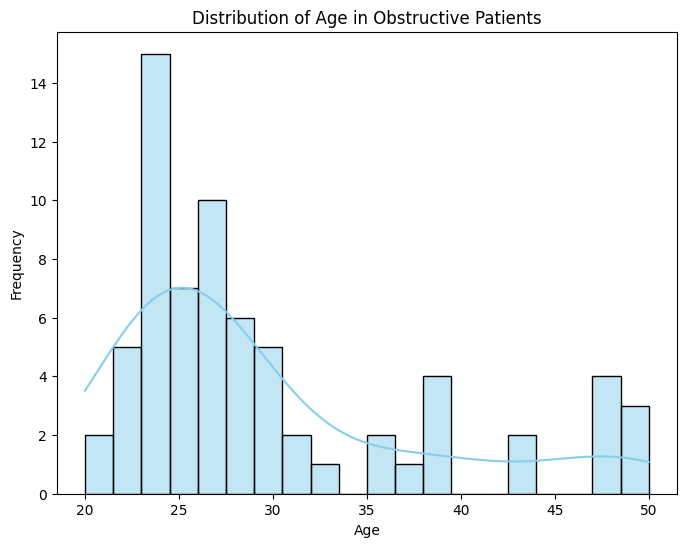

Age Skewness: 1.328


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for demographical features - check the symmetric of the distribution
# Plot BMI distribution
plt.figure(figsize=(8, 6))
sns.histplot(df, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age in Obstructive Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

bmi_skew = df['Age'].skew()
print(f"Age Skewness: {bmi_skew:.3f}")

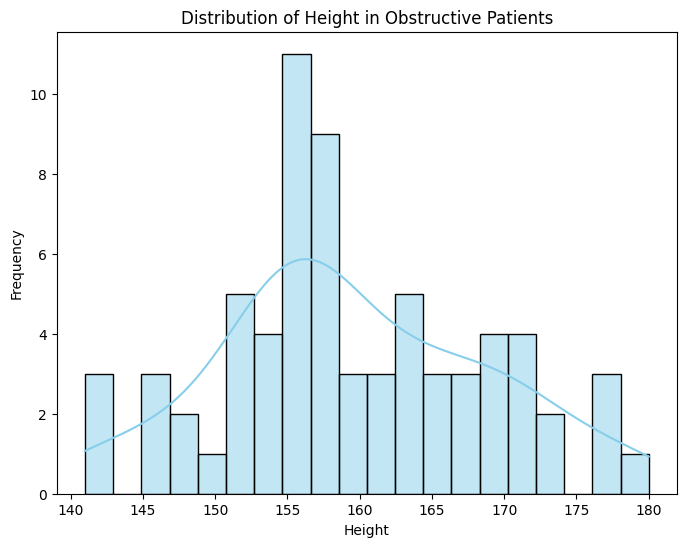

Height Skewness: 0.186


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot BMI distribution
plt.figure(figsize=(8, 6))
sns.histplot(df, x=df.iloc[:, 3], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Height in Obstructive Patients')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

bmi_skew = df.iloc[:, 3].skew()
print(f"Height Skewness: {bmi_skew:.3f}")

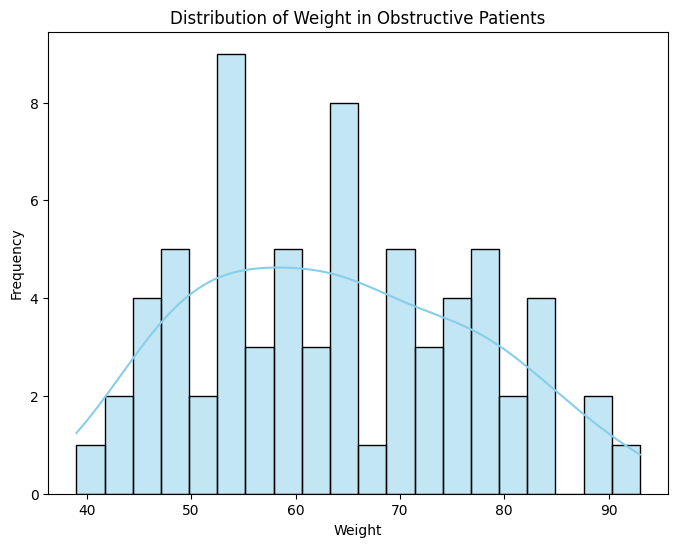

Weight Skewness: 0.247


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot BMI distribution
plt.figure(figsize=(8, 6))
sns.histplot(df, x=df.iloc[:, 4], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Weight in Obstructive Patients')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()


bmi_skew = df.iloc[:, 4].skew()
print(f"Weight Skewness: {bmi_skew:.3f}")

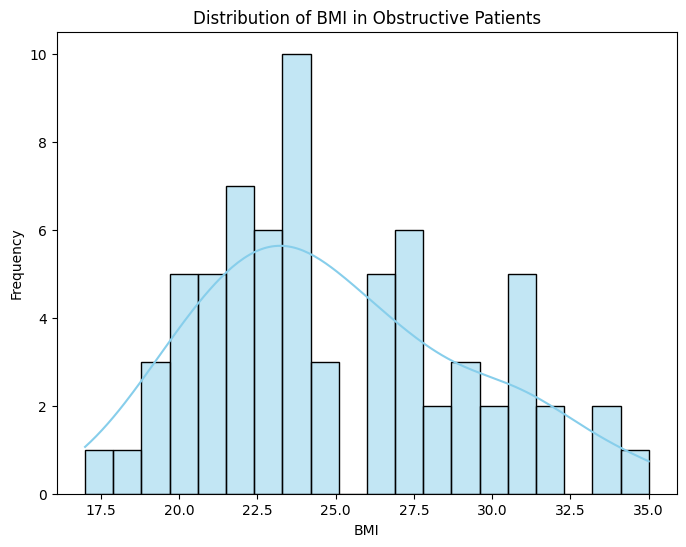

Weight Skewness: 0.463


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot BMI distribution
plt.figure(figsize=(8, 6))
sns.histplot(df, x='BMI', bins=20, kde=True, color='skyblue')
plt.title('Distribution of BMI in Obstructive Patients')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


bmi_skew = df.iloc[:, 5].skew()
print(f"Weight Skewness: {bmi_skew:.3f}")

In [ ]:
# counts and percentages of qualitative variables
gender_counts = df['Gender'].value_counts()
print(gender_counts)

gender_percent = df['Gender'].value_counts(normalize=True) * 100
print(gender_percent)

Gender
Female    61
Male      32
Name: count, dtype: int64
Gender
Female    65.591398
Male      34.408602
Name: proportion, dtype: float64


In [ ]:
gender_counts = df['BMI_Cat'].value_counts()
print(gender_counts)

gender_percent = df['BMI_Cat'].value_counts(normalize=True) * 100
print(gender_percent)

BMI_Cat
High      47
Normal    20
Low        2
Name: count, dtype: int64
BMI_Cat
High      68.115942
Normal    28.985507
Low        2.898551
Name: proportion, dtype: float64


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr

# --------------------------
# Mixed Correlation Coefficients and P-values included head maps
# --------------------------
def mixed_corr_matrix_with_pvalues(df):
    n = df.shape[1]
    corr_matrix = pd.DataFrame(np.zeros((n, n)), columns=df.columns, index=df.columns)
    pval_matrix = pd.DataFrame(np.ones((n, n)), columns=df.columns, index=df.columns)

    for col1 in df.columns:
        for col2 in df.columns:
            if df[col1].nunique() == 2 and df[col2].nunique() == 2:
                # Binary-binary using Phi coefficient
                contingency_table = pd.crosstab(df[col1], df[col2])
                chi2, p, _, _ = chi2_contingency(contingency_table)
                phi = np.sqrt(chi2 / len(df))
                corr_matrix.loc[col1, col2] = phi
                pval_matrix.loc[col1, col2] = p

            elif df[col1].nunique() != 2 and df[col2].nunique() != 2:
                # Numerical-numerical using Spearman correlation
                corr, p = spearmanr(df[col1], df[col2])
                corr_matrix.loc[col1, col2] = corr
                pval_matrix.loc[col1, col2] = p

            else:
                # Binary-numerical using Point-Biserial correlation
                if df[col1].nunique() == 2:
                    corr, p = pointbiserialr(df[col1], df[col2])
                else:
                    corr, p = pointbiserialr(df[col2], df[col1])
                corr_matrix.loc[col1, col2] = corr
                pval_matrix.loc[col1, col2] = p

    return corr_matrix, pval_matrix

# --------------------------
# Load and prepare data
# --------------------------

# Replace with your actual DataFrame loading
# data1 = pd.read_csv('your_file.csv')

# Assuming `df` is your original DataFrame:
df_New = df.iloc[:, 1:-11]  # Adjust this slice as needed

# Custom label encoding for Gender
custom_mapping = {'Male': 0, 'Female': 1}
cm = {'T': 1, 'F': 0}
df_New['Gender'] = df_New['Gender'].map(custom_mapping)
df_New['Type'] = df_New['Type'].map(cm)
# --------------------------
# Compute matrices
# --------------------------
corr_matrix, pval_matrix = mixed_corr_matrix_with_pvalues(df_New)

# --------------------------
# Plot correlation heatmap
# --------------------------
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Coefficient Matrix Heatmap - Obstructive and Restrictive Patients")
plt.show()

# --------------------------
# Plot p-value heatmap
# --------------------------
plt.figure(figsize=(12, 10))
sns.heatmap(pval_matrix, annot=True, cmap='viridis', fmt='.3f')
plt.title("P-Value Matrix Heatmap - Obstructive Patient and Restrictive Patients")
plt.show()


KeyError: 'Type'